### Imports and installations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys

from zipfile import ZipFile
import os.path
from os import path

import tomotopy as tp
import glob
import re
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame, Markdown, display

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# if you need to install tomotopy or seaborn uncomment the relevant lines below
# run this cell
# re-run the cell above

!pip install tomotopy
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 39.8 MB/s eta 0:00:00


In [ ]:
# note if you get an error with stopwords below then uncomment the following lines and re-run this cell
import nltk
nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


The following cell contain a preprocessing function will use for all our topic models.

In [ ]:
def preprocess_data(doc_set, extra_stopwords={}):
    # adapted from https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

    # replace all newlines or multiple sequences of spaces with a standard space
    doc_set = [re.sub(r'\s+', ' ', doc_set)]

    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')

    # create English stop words list
    en_stop = set(stopwords.words('english'))

    # add any extra stopwords
    if (len(extra_stopwords) > 0):
        en_stop = en_stop.union(extra_stopwords)

    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # add tokens to list
        texts.append(stopped_tokens)

    return texts

In [ ]:
import os
os.chdir('/content/drive/MyDrive/DIGI405 /corpus/AT_18_20/')

In [ ]:
import nltk
from nltk.text import Text
from nltk.tokenize import word_tokenize

# Make sure to download the required NLTK resources first
nltk.download('punkt')

# Load your text data
with open("combined_file.txt", "r", encoding="utf-8") as file:
    text_data = file.read()

# Tokenize the text data
#tokens = word_tokenize(text_data)
#text_obj = Text(tokens)

# # Find and print concordance for "tourism" and "tourist"
# print("Concordance for 'tourism':")
# text_obj.concordance("tourism", lines=25)

# print("\nConcordance for 'tourist':")
# text_obj.concordance("tourist", lines=25)


# print("\nConcordance for 'australia':")
# text_obj.concordance("australian", lines=25)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# example_number = '1'

# document_list = ["apple orange kiwifruit banana pineapple guava lemon plum",
#                  "dog cat rabbit mouse bird fish goat seamonkey"
#                 ]

# source_list = ["fruit", "pets"] # this just gives us labels for our documents

# # You can add extra stopwords here, between the curly brackets, in addition to NLTK's stopword list
# doc_clean = preprocess_data(document_list, {})

# docs_and_source = list(zip(source_list, document_list)) # combine source and document lists for later use
# docs_and_source = [list(item) for item in docs_and_source] # make'em lists for easier reuse

In [ ]:
# docs_and_source

[['fruit', 'apple orange kiwifruit banana pineapple guava lemon plum'],
 ['pets', 'dog cat rabbit mouse bird fish goat seamonkey']]

In [ ]:
# example_number = '2'

# document_list = ["The cat (Felis catus) is a domestic species of small carnivorous mammal. It is the only domesticated species in the family Felidae and is often referred to as the domestic cat to distinguish it from the wild members of the family.",
#                  "The dog or domestic dog (Canis familiaris or Canis lupus familiaris) is a domesticated descendant of the wolf. The dog is derived from an ancient, extinct wolf, and the modern wolf is the dog's nearest living relative.",
#                  "Cats are beautiful creatures who have a great deal to offer their human companions. It is thought that cats were first domesticated by humans around 5000 years ago and were used to help protect farmers crops from mice and other rodents.",
#                  "The connection between humans and dogs has been long acknowledged as one of the strongest bonds around - even if, at some point, they will inevitably try to steal a sausage off your plate. Here's why we think dogs are the best pets ever."
#                 ]

# source_list = ['Cat wiki page', 'Dog wiki page', 'Cat-world.com', 'GoodHousekeeping.com' ]

# doc_clean = preprocess_data(document_list, {})

# docs_and_source = list(zip(source_list, document_list)) # combine source and document lists for later use
# docs_and_source = [list(item) for item in docs_and_source] # make'em lists for easier reuse

In [ ]:

doc_clean = preprocess_data(text_data, {})


In [ ]:
doc_clean

[['2',
  'billion',
  'hotel',
  'building',
  'boom',
  'biggest',
  'hotel',
  'construction',
  'period',
  'new',
  'zealand',
  'full',
  'swing',
  '2',
  'billion',
  'worth',
  'construction',
  'completed',
  'way',
  'past',
  '12',
  'months',
  '1000',
  'new',
  'hotel',
  'rooms',
  'opened',
  'total',
  '440',
  'auckland',
  '380',
  'wellington',
  '170',
  'queenstown',
  '86',
  'christchurch',
  'colliers',
  'report',
  'said',
  'another',
  '3900',
  'construction',
  'two',
  'thirds',
  'auckland',
  'including',
  '300',
  'room',
  'horizon',
  'hotel',
  'built',
  'alongside',
  'construction',
  'new',
  'zealand',
  'international',
  'convention',
  'centre',
  'skycity',
  'hotel',
  'opening',
  'date',
  'air',
  'huge',
  'fire',
  'convention',
  'centre',
  'colliers',
  'international',
  'hotels',
  'specialist',
  'dean',
  'humphries',
  'said',
  'new',
  'construction',
  'started',
  'past',
  '18',
  'months',
  '10',
  '15',
  'years',
  

In [ ]:


# Intialize the model
model = tp.LDAModel(k=4) # here we set the number of topics

num_topic_words = 15 # we'll display 10 words to represent each topic

# Add each document to the model
for text in doc_clean:
    model.add_doc(text)

print("Topic Model Training...\n")

# train the model
# we have specified 200 (10*20) iterations of Gibbs sampling total
# the loop reports Log Liklihood/word every 10 iterations. This is a measure of model fit to the data (higher is better)
for i in range(0, 100, 10):
    model.train(iter=20)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

# print topic words
for k in range(model.k):
    print('\nTop 15 words of topic #{}\n'.format(k))
    print(model.get_topic_words(k, top_n=num_topic_words)) # here we request 10 words to represent each topic

# get info about the model we just trained
print("\nModel Summary\n")
model.summary()

Topic Model Training...

Iteration: 0	Log-likelihood: -8.733495618148309
Iteration: 10	Log-likelihood: -8.693138757376262
Iteration: 20	Log-likelihood: -8.677882641857014
Iteration: 30	Log-likelihood: -8.657872243410397
Iteration: 40	Log-likelihood: -8.631328656879624
Iteration: 50	Log-likelihood: -8.639529791457903
Iteration: 60	Log-likelihood: -8.64933390629677
Iteration: 70	Log-likelihood: -8.642653207777483
Iteration: 80	Log-likelihood: -8.636285576138212
Iteration: 90	Log-likelihood: -8.65403941397809

Top 15 words of topic #0

[('hotel', 0.05661480128765106), ('said', 0.04191013425588608), ('auckland', 0.023713110014796257), ('would', 0.02077217772603035), ('new', 0.01948552019894123), ('per', 0.018198862671852112), ('government', 0.008089403621852398), ('family', 0.007721787318587303), ('around', 0.0075379787012934685), ('property', 0.007354170549660921), ('city', 0.006802745629101992), ('chief', 0.006802745629101992), ('night', 0.006618937011808157), ('centre', 0.00643512886017

In [ ]:
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

topics = []
topic_individual_words = []
for topic_number in range(0, model.k):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())

In [ ]:
topics

['hotel said auckland would new per government family around property city chief night centre good',
 'new tourism zealand cent business accommodation also australia time sudima next company event money christchurch',
 'hotels year says visitors rooms people years market travel million queenstown last nz sector growth',
 'industry international room one visitor could building roberts australian group 5 events rates local great']

In [ ]:
topic_distributions # topic proportions in documents as a list

#topics # topic words as a string

#topic_individual_words # topic words as a list

[[0.2728593, 0.25059402, 0.2584884, 0.21805829]]

In [ ]:
def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### Topic {topic_index}\n\n{topic_words}\n\n---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        bolded = []
        for word in doc[1].split():
            if word.lower().strip(')(.?!,') in topic_words.split():
                bolded.append('**{}**'.format(word))
            else:
                bolded.append(word)

        make_md(f'  \n**Topic Probability**: {probability}  \n**Source**: {doc[0]}  \n**Document**: {" ".join(bolded)} \n\n')

    return

In [ ]:
for topic_num in range(model.k):
    get_top_docs(doc_clean, topic_distributions, topic_index=topic_num, n=5)

### Topic 0

hotel said auckland would new per government family around property city chief night centre good

---

  
**Topic Probability**: 0.2728593051433563  
**Source**: 2  
**Document**: billion 



### Topic 1

new tourism zealand cent business accommodation also australia time sudima next company event money christchurch

---

  
**Topic Probability**: 0.25059401988983154  
**Source**: 2  
**Document**: billion 



### Topic 2

hotels year says visitors rooms people years market travel million queenstown last nz sector growth

---

  
**Topic Probability**: 0.25848838686943054  
**Source**: 2  
**Document**: billion 



### Topic 3

industry international room one visitor could building roberts australian group 5 events rates local great

---

  
**Topic Probability**: 0.2180582880973816  
**Source**: 2  
**Document**: billion 



In [ ]:
# here we'll construct a document-topic matrix
# rows are documents, columns are topics
# values are frequency of words assigned to this topic in this document

import numpy as np
from collections import Counter

doc_topic_df = pd.DataFrame(0, index=np.arange(len(model.docs)), columns=np.arange(model.k))

for row, doc in enumerate(model.docs):
    doc_topic_counts = Counter(doc.topics)
    for k, v in doc_topic_counts.items():
        doc_topic_df.iloc[row, k] = v

doc_topic_df.columns = ['Topic ' + str(t) for t in range(model.k)]

doc_topic_df

,Topic 0,Topic 1,Topic 2,Topic 3
0,5392,4952,5108,4309


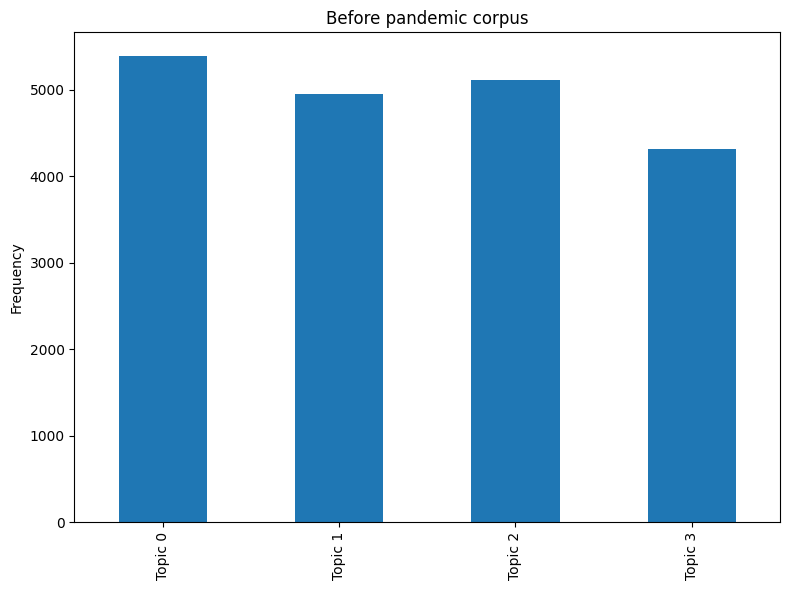

In [ ]:
# Transpose the dataframe, then plot a bar chart per document
# Don't use this with large numbers of documents!

h = len(model.docs)

axes = doc_topic_df.T.plot.bar(subplots=True,
                                figsize=(8,6),
                                title=['Before pandemic corpus'],
                                legend=False,
                                sharex=False,
                                sharey=True,
                                ylabel='Frequency')

fig = axes[0].get_figure()
fig.tight_layout()

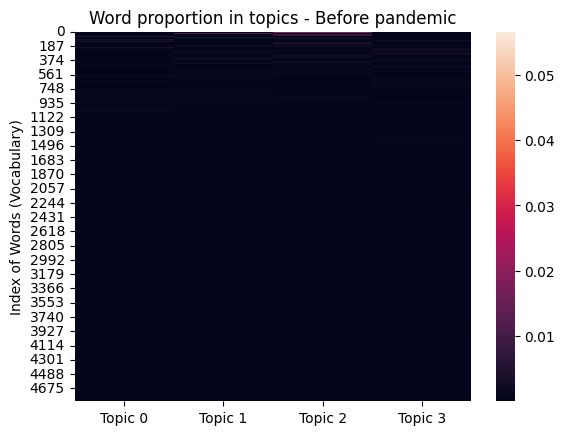

In [ ]:
example_number = 'Before pandemic'
topic_dist_list = []

for t in range(model.k):
    topic_dist_list.append(model.get_topic_word_dist(t, normalize=True))

topic_dist_df = pd.DataFrame(topic_dist_list)

transformed = topic_dist_df.T
transformed.columns = ['Topic ' + str(t) for t in range(model.k)]
ax = sns.heatmap(transformed)

plt.title('Word proportion in topics - {}'.format(example_number), fontsize = 12)
plt.ylabel('Index of Words (Vocabulary)', fontsize = 10)

plt.show()